---
title: "Example Notebooks of SPICE Toolkit" \
author: "Naoya Ozaki" \
date: "26 November 2022" \
output: "spice_example"

---

## Plot Moon's Orbit
Import SPICE library (download generic kernels if needed) and obtain the position and velocity of the moon.
The download of the generic kernels may take long time because of downloading the large file (~120MB).

In [1]:
import SPICE
using NBodyPropagator

init_spice_kernels()

# Get Constant of Solar System Dynamics
ssd = SolarSystemDynamics()

SolarSystemDynamics(1.495978707e8, Dict{String, Integer}("CALLISTO" => 504, "JUPITER BARYCENTER" => 5, "DEIMOS" => 402, "IO" => 501, "TITAN" => 606, "SATURN" => 699, "URANUS" => 799, "EUROPA" => 502, "MERCURY" => 199, "PLUTO BARYCENTER" => 9…), Dict("CALLISTO" => 7179.28936139727, "JUPITER BARYCENTER" => 1.267127648000002e8, "DEIMOS" => 9.615569648120313e-5, "IO" => 5959.9160334104035, "TITAN" => 8978.138845307376, "SATURN" => 3.793120749865224e7, "URANUS" => 5.793951322279009e6, "EUROPA" => 3202.738774922892, "MERCURY" => 22031.78000000002, "PLUTO BARYCENTER" => 977.0000000000007…), Dict("CALLISTO" => 2410.3, "DEIMOS" => 7.8, "IO" => 1829.4, "TITAN" => 2575.15, "SATURN" => 60268.0, "URANUS" => 25559.0, "EUROPA" => 1562.6, "MERCURY" => 2439.7, "PHOBOS" => 13.0, "MOON" => 1737.4…), Dict{Integer, String}(5 => "JUPITER BARYCENTER", 402 => "DEIMOS", 799 => "URANUS", 499 => "MARS", 199 => "MERCURY", 501 => "IO", 399 => "EARTH", 8 => "NEPTUNE BARYCENTER", 1 => "MERCURY BARYCENTER", 699 => "S

In [2]:
# Parameter Setting
et0 = SPICE.str2et("2021/04/06 13:52:32 UTC") # Initial Epoch
etf = SPICE.str2et("2022/04/06 13:52:32 UTC") # Final Epoch
num_grid = 10000 # Number of Grid

# Pre-calculation
et_all = LinRange(et0,etf,num_grid)
x_moon = zeros(num_grid, 6)

# Iteration
for i = 1:num_grid
    x_moon[i,:], _ = SPICE.spkez(301, et_all[i], "ECLIPJ2000", "NONE", 399)
end

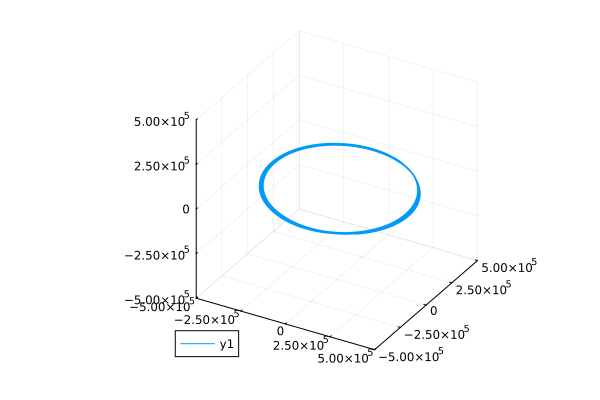

In [3]:
using Plots
plot(x_moon[:, 1], x_moon[:, 2], x_moon[:, 3], xlim=[-5e5, 5e5], ylim=[-5e5, 5e5], zlim=[-5e5, 5e5], aspect_ratio=:equal)